# MLB Attandance Improvement 

## Factors Affecting for Stadium Attendance of Dodgers Major League (MLB) Team
In these analyses I will be using Los Angeles Dodgers Major League (MLB) team data to find out what factors are critical to improve attendance.
The aim of this study was to examine the factors that affect baseball fan stadium attendance. I believe one of the biggest profits for sports sponsorship is attendance of fans. Therefore, selling more tickets are important to keep the teams alive financially, also fans are significant part of promotions the sport and thy have plaid the significant role in the economic growth of the contrary. I will use this dataset to do some visualization and some statistical test to tell the story step by step.  In the fallowing I will making a recommendation to management on how to improve attendance:
##### Exploring the data
##### Visualization 
##### Hypothesis test
##### Conclusion 



In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import yellowbrick
from sklearn.model_selection import train_test_split #used to split data into training/test sets
from sklearn.metrics import plot_confusion_matrix

# Exploring the data

In [2]:
# load the "dodgers-2022" data feame  
df = pd.read_csv('dodgers-2022.csv') #reading file
df.head()

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


In [3]:
# Display the demension of the data 
df.shape

(81, 12)

In [4]:
df.isnull().sum()

month          0
day            0
attend         0
day_of_week    0
opponent       0
temp           0
skies          0
day_night      0
cap            0
shirt          0
fireworks      0
bobblehead     0
dtype: int64

In [5]:
# Display the columns name
df.columns 

Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'],
      dtype='object')

# Observations
$\bullet$ The dataset has $81$ rows and $12$ columns <br>
$\bullet$ All the columns are usefull<br>
$\bullet$ There is a mix of numerical and categorical data <br>
$\bullet$ The target of the model will be 'attend':<br>
$\bullet$ there is no missing value<br>

In [6]:
# Look at the columns data type
df.dtypes


month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

In [7]:
# Get summary statistic of the numerical data
df.describe()

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [8]:
#get summary statistics of the non-numerical data
df.describe(include = ['O'])

,month,day_of_week,opponent,skies,day_night,cap,shirt,fireworks,bobblehead
count,81,81,81,81,81,81,81,81,81
unique,7,7,17,2,2,2,2,2,2
top,MAY,Tuesday,Giants,Clear,Night,NO,NO,NO,NO
freq,18,13,9,62,66,79,78,67,70


In [9]:
# Check any missing values accros columns
df.isnull().any()

month          False
day            False
attend         False
day_of_week    False
opponent       False
temp           False
skies          False
day_night      False
cap            False
shirt          False
fireworks      False
bobblehead     False
dtype: bool

### Observations

$\bullet$ There is no missing data to deal with <br>
$\bullet$ Data is clean



In [10]:
variance = df["attend"].var()
variance

68849161.09444445

# Graphical analysis creating

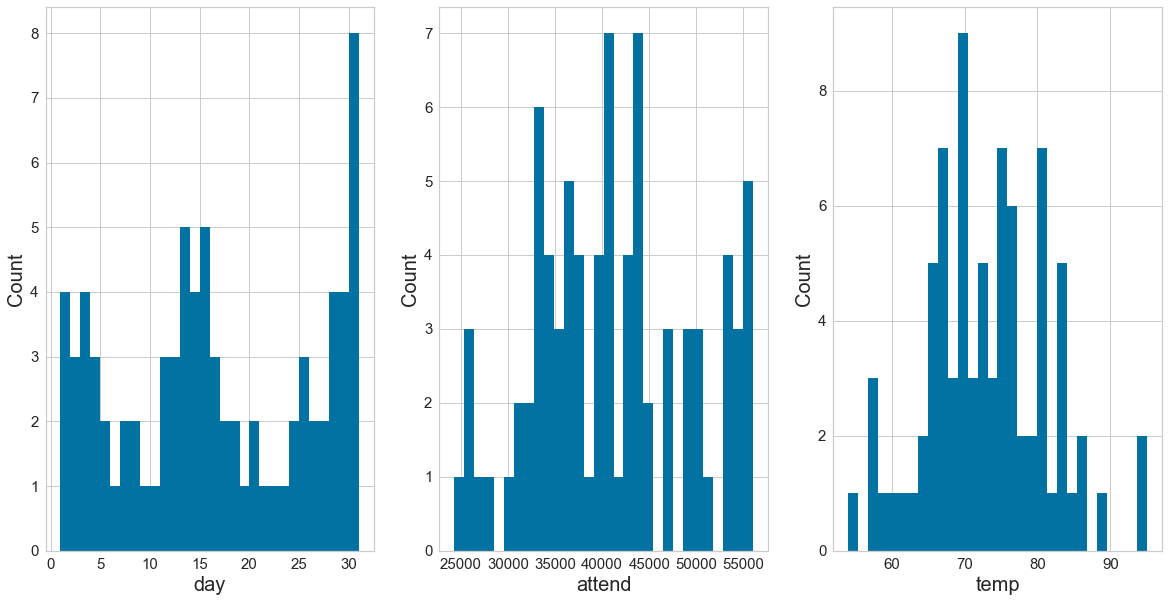

In [11]:
#get histograms of the numerical features
#set the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 1, ncols = 3)
# Specify the features of interest
num_features = ['day' ,'attend', 'temp']
xaxes = num_features
yaxes = ['Count', 'Count', 'Count']
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

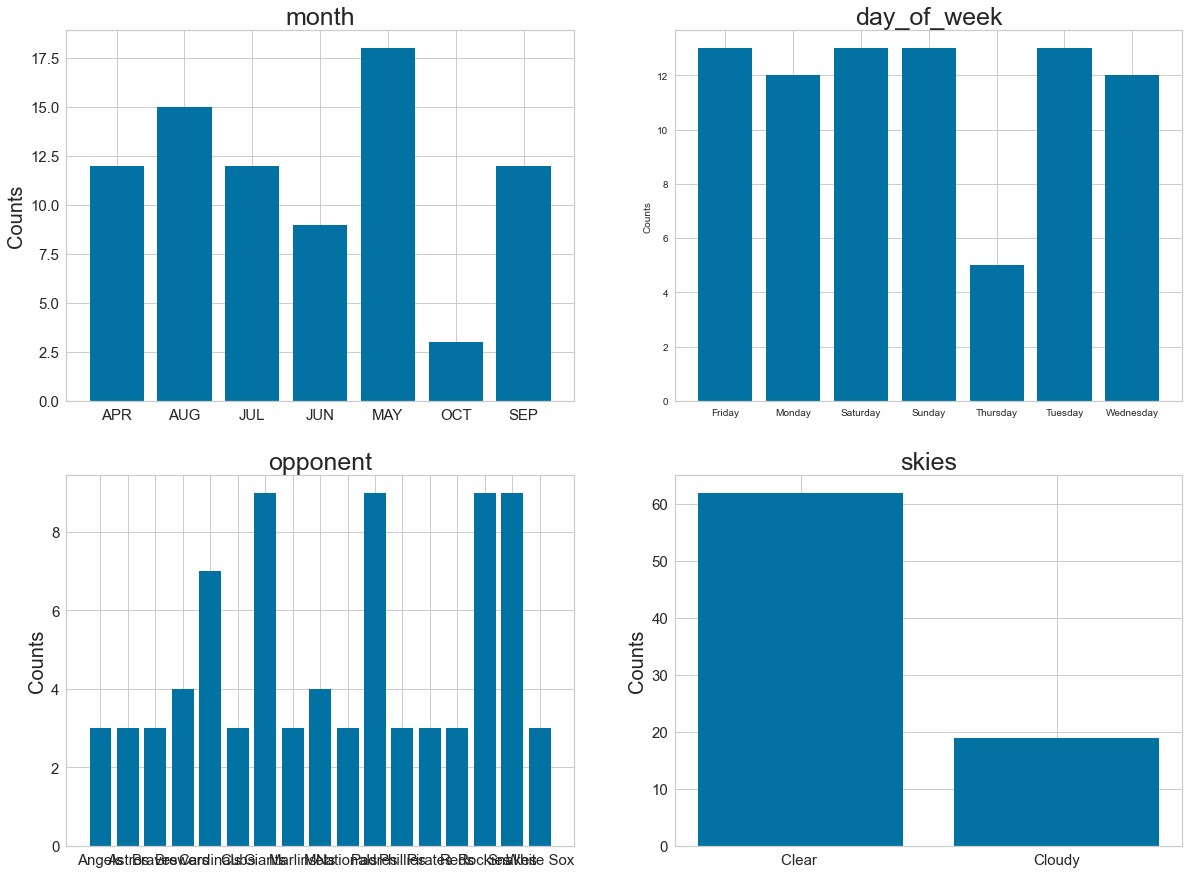

In [12]:

#create a copy of the data frame for use with graphing
df_plots = df.copy()
plt.rcParams['figure.figsize'] = (20, 15)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_month = df_plots.groupby('month').size().reset_index(name='Counts')['month']
Y_month = df_plots.groupby('month').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_month, Y_month)
axes[0, 0].set_title('month', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_day_of_week = df_plots.groupby('day_of_week').size().reset_index(name='Counts')['day_of_week']
Y_day_of_week = df_plots.groupby('day_of_week').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_day_of_week, Y_day_of_week)
axes[0, 1].set_title('day_of_week', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=10)
axes[0, 1].tick_params(axis='both', labelsize=10)

# make the data read to feed into the visulizer
X_opponent = df_plots.groupby('opponent').size().reset_index(name='Counts')['opponent']
Y_opponent= df_plots.groupby('opponent').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_opponent, Y_opponent)
axes[1, 0].set_title('opponent', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_skies = df_plots.groupby('skies').size().reset_index(name='Counts')['skies']
Y_skies = df_plots.groupby('skies').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_skies, Y_skies)
axes[1, 1].set_title('skies', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

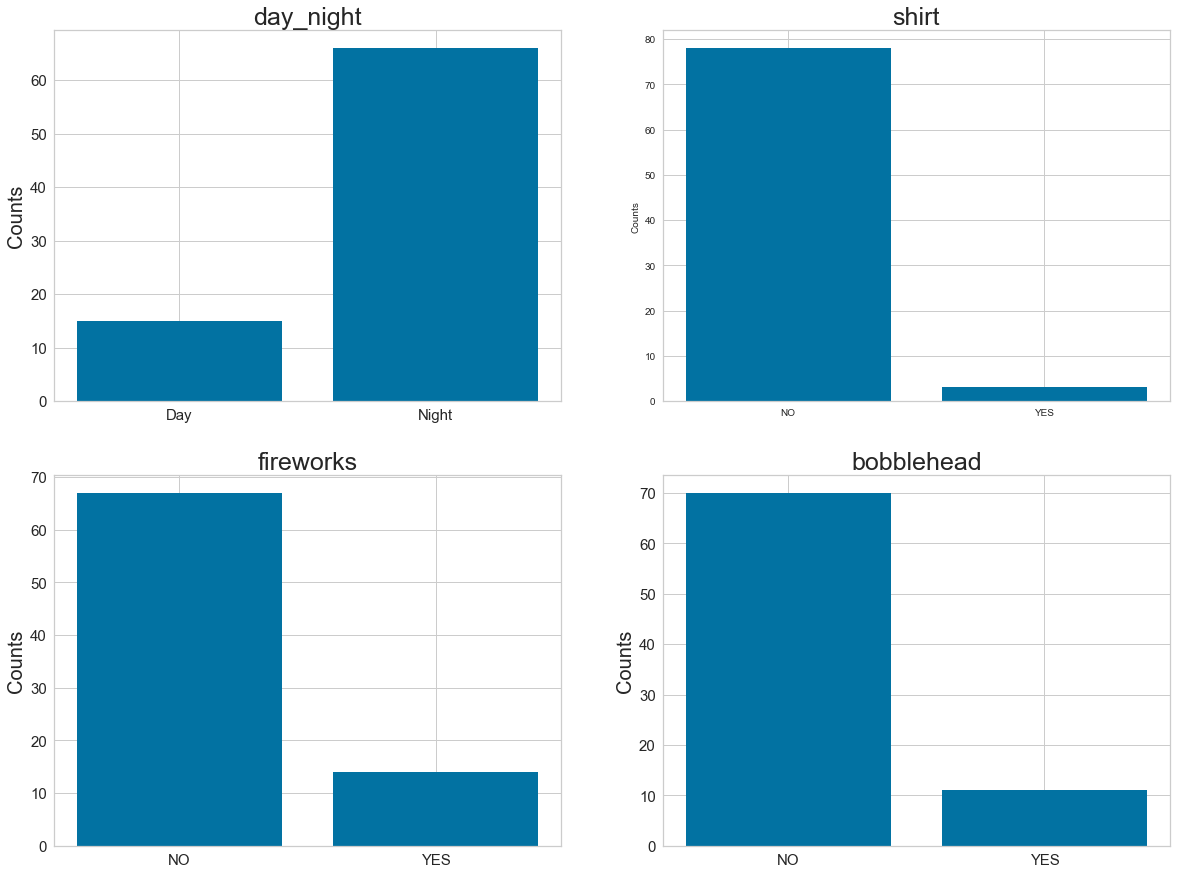

In [13]:

#create a copy of the data frame for use with graphing
df_plots = df.copy()
plt.rcParams['figure.figsize'] = (20, 15)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_day_night = df_plots.groupby('day_night').size().reset_index(name='Counts')['day_night']
Y_day_night = df_plots.groupby('day_night').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_day_night, Y_day_night)
axes[0, 0].set_title('day_night', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_shirt = df_plots.groupby('shirt').size().reset_index(name='Counts')['shirt']
Y_shirt = df_plots.groupby('shirt').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_shirt, Y_shirt)
axes[0, 1].set_title('shirt', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=10)
axes[0, 1].tick_params(axis='both', labelsize=10)

# make the data read to feed into the visulizer
X_fireworks = df_plots.groupby('fireworks').size().reset_index(name='Counts')['fireworks']
Y_fireworks= df_plots.groupby('fireworks').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_fireworks, Y_fireworks)
axes[1, 0].set_title('fireworks', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_bobblehead = df_plots.groupby('bobblehead').size().reset_index(name='Counts')['bobblehead']
Y_bobblehead = df_plots.groupby('bobblehead').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_bobblehead, Y_bobblehead)
axes[1, 1].set_title('bobblehead', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

## Pie Chart Percentage Calculator

<AxesSubplot:ylabel='attend'>

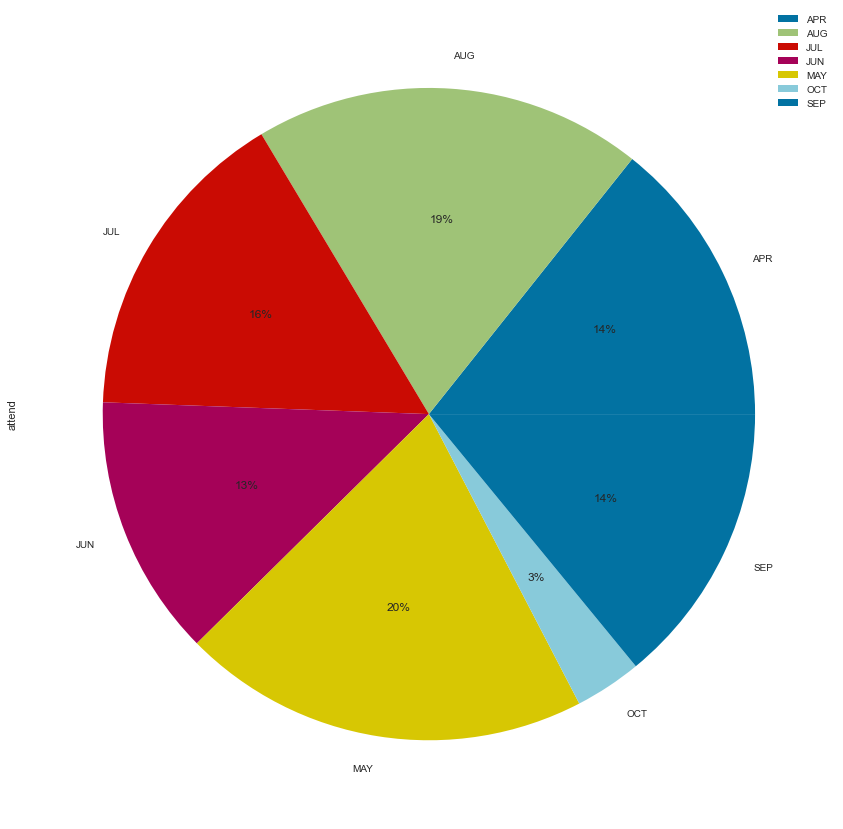

In [14]:
# Creat the pie chart to display the percentage of attendance during the month
df.groupby(['month']).sum().plot(kind='pie', y='attend', autopct='%1.0f%%')

<AxesSubplot:ylabel='attend'>

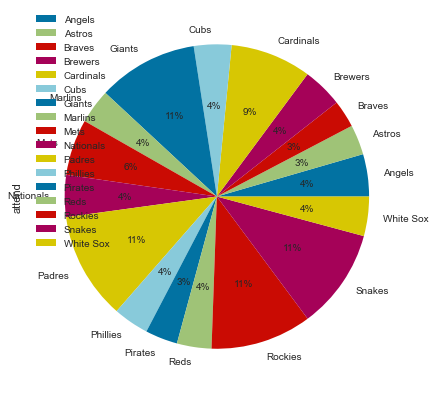

In [41]:
# Creat the pie chart to display the percentage of attendance during the month
df.groupby(['opponent']).sum().plot(kind='pie', y='attend', autopct='%1.0f%%')

<AxesSubplot:ylabel='attend'>

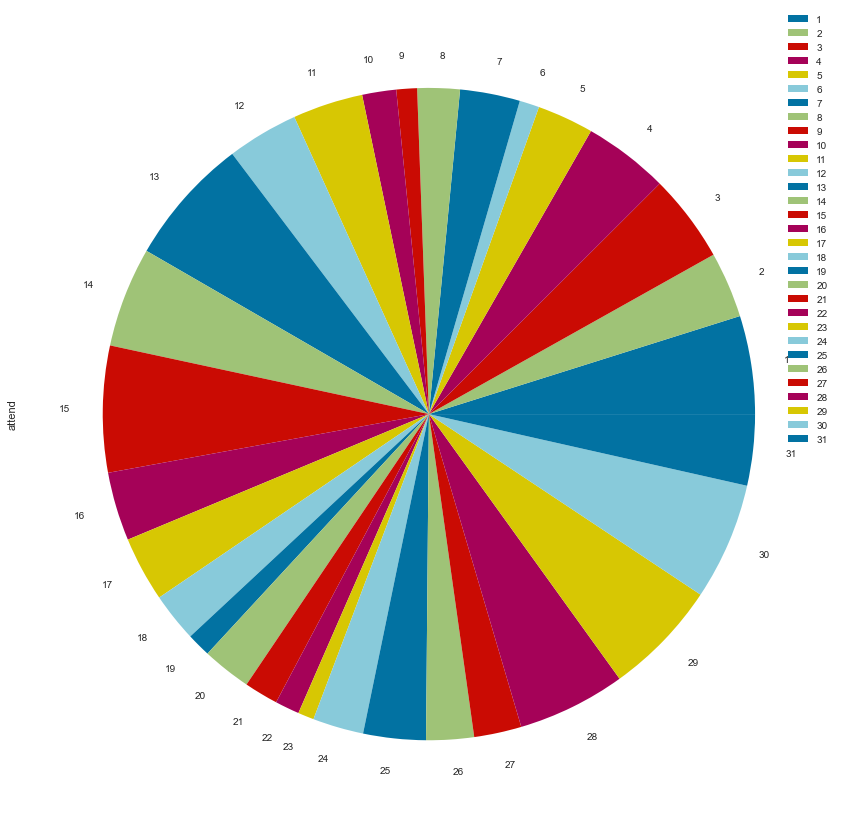

In [15]:
# Creat the pie chart to display the percentage of attendance during the day
df.groupby(['day']).sum().plot(kind='pie', y='attend')

<AxesSubplot:ylabel='attend'>

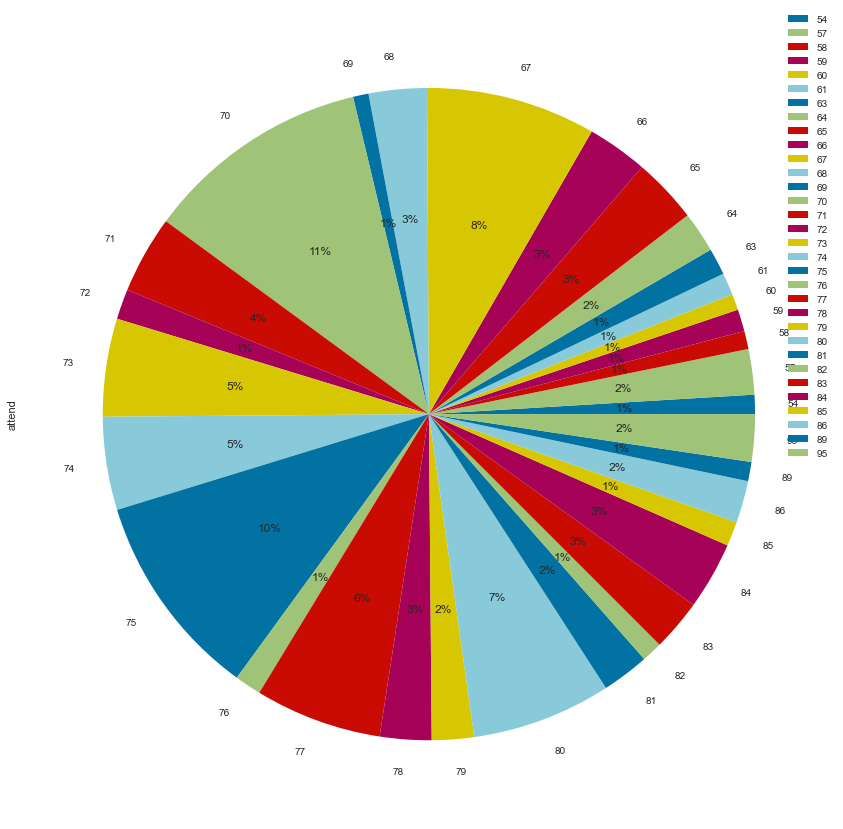

In [16]:
# Creat the pie chart to display the percentage of attendance during the temp
df.groupby(['temp']).sum().plot(kind='pie', y='attend', autopct='%1.0f%%')

<AxesSubplot:ylabel='attend'>

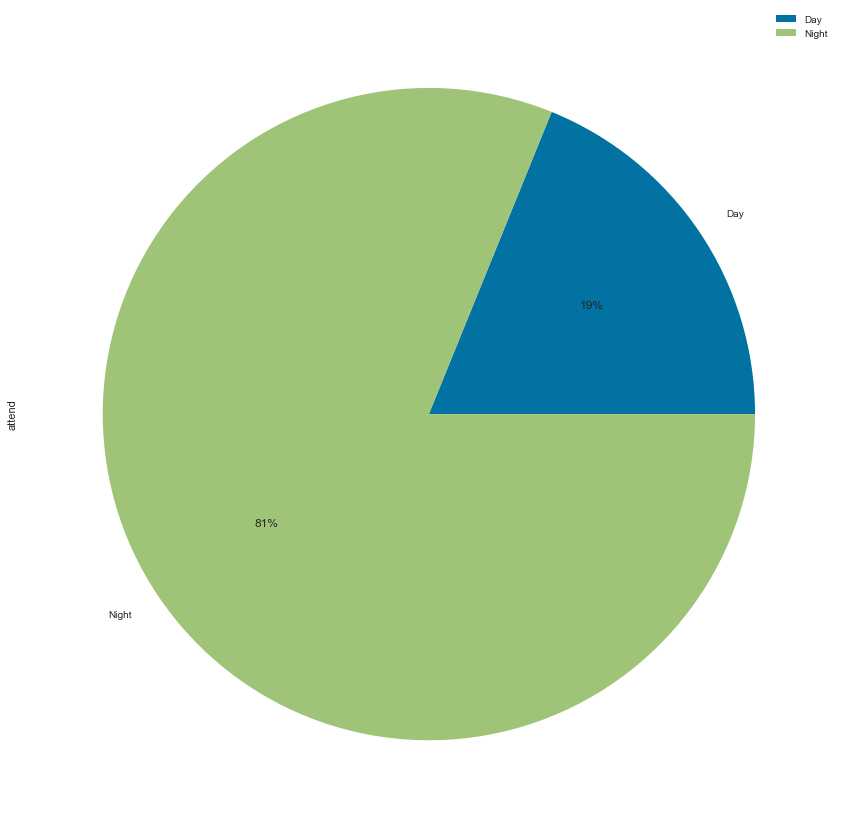

In [17]:
# Creat the pie chart to display the percentage of attendance during the day_night
# Comparing the percentage attendance during the day and night
df.groupby(['day_night']).sum().plot(kind='pie', y='attend', autopct='%1.0f%%')


<AxesSubplot:title={'center':'Points Scored by Team'}, ylabel='attend'>

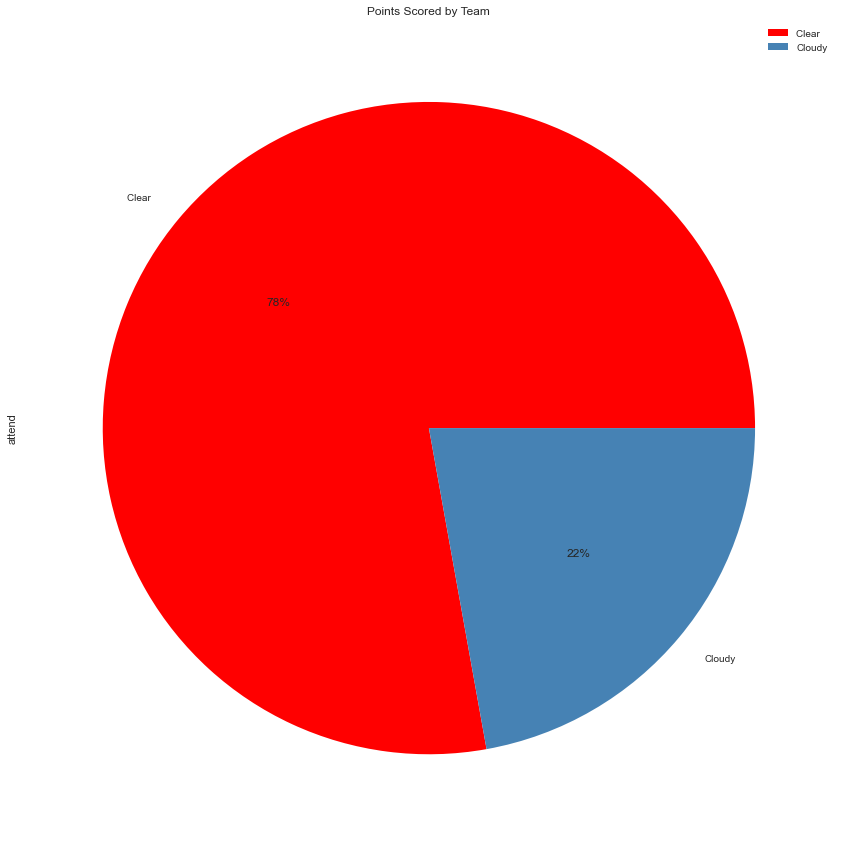

In [18]:
# Creat the pie chart to display the percentage of attendance during the skies 
df.groupby(['skies']).sum().plot(kind='pie', y='attend', autopct='%1.0f%%',
                                colors = ['red', 'steelblue'],
                                title='Points Scored by Team')

### Observations

$\bullet$ Spring and Summer are the best season for stadiums attendance<br>
$\bullet$ Middle of month and end of month are the best times for stadiums attendance <br>
$\bullet$ 67 to 75 Fahrenheit are the best temperature frame for stadium attendance <br>
$\bullet$ 81% of attendance prefer to watch the baseball game during the night instead of day<br>
$\bullet$ 78% of attendance prefer to watch the baseball game at the clear sky <br>


In [19]:
df.columns


Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'],
      dtype='object')

In [20]:
df.columns

Index(['month', 'day', 'attend', 'day_of_week', 'opponent', 'temp', 'skies',
       'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'],
      dtype='object')

### Heatmap to show the correlation of the data


<AxesSubplot:>

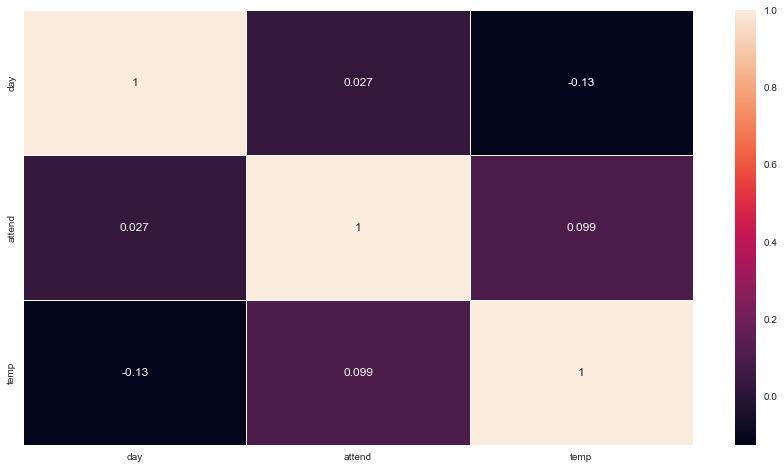

In [21]:
ax= plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),linewidths=1,linecolor='white',annot=True)

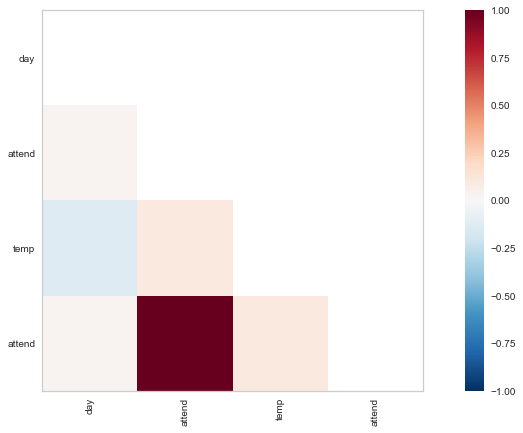

In [40]:
#create a heat map of the Pearson correlation coefficients of the numerical features
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)

heat_map_features = num_features.copy()
#add 'Survived' to the heat map features
heat_map_features.append('attend')
# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[heat_map_features].values

# instantiate the visualizer 
heat_map = Rank2D(features=heat_map_features, algorithm='pearson')
heat_map.fit_transform(X) #fit and tranform the data for the heat map
plt.show() 

### Observations

$\bullet$ The numerical feature most highly correlated with attend<br>
$\bullet$ There is significant collinearity between the features

## Analysis Summary

The aim of this study was to examine the factors that affect baseball fan stadium attendance. I import the necessary packages first and load the data. Explore the dataset. The dataset collected with numerical and categorical data with no missing data. I got the summary statistics to get the feel of dataset

I prefer to create graphical analysis to compare the data visually. Therefore, I used the histogram for numerical variables and used the bar chart for categorical features. Pie chart visualization is another method I used to get the percentage of important variables to get the hypothesis test. Moreover, I used the heatmap to get the correlation coefficients of the numerical features.

#### Below is the result of dataset analysis :

Spring and Summer are the best season for stadiums attendance 

Middle of month and end of month are the best times for stadiums attendance

67 to 75 Fahrenheit are the best temperature frame for stadium attendance 

81% of attendance prefer to watch the baseball game during the night instead of day

78% of attendance prefer to watch the baseball game at the clear sky 


# Recommendation

### Based on the dataset and the visualization method I’ve used, I would recommend to schedule the games during the night, spring & summer, clear sky, and most importantly on the end of the each month. 